# Actividad VI- Obtención datos desde API

Se ha completado la actividad siguiendo los pasos establecidos en la consigna. Se utilizó la API de Spotify para obtener información sobre las canciones más populares, extrayendo datos relevantes como el nombre de las pistas, su popularidad, así como los artistas que las interpretan. Esto incluyó la identificación de las canciones y géneros más populares, así como la recopilación de información sobre los artistas, centrándose en aquellos con un mayor número de seguidores y en su popularidad general. Esta información fue organizada en un DataFrame utilizando la librería Pandas, lo que facilitó el análisis y la visualización de los datos.

Durante la exploración del DataFrame, se verificaron el número de filas y columnas, y los tipos de datos de cada columna. Se pudieron identificar las canciones más populares y los artistas más destacados según su número de seguidores y su popularidad en la plataforma. Esta actividad no solo complementa el dataset elegido previamente, sino que también proporciona una visión integral de las tendencias actuales en la música, permitiendo futuros análisis más profundos.

# Librerias

In [23]:
import pandas as pd


In [24]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [25]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

# Acceder a la API de Spotify

In [26]:
client_id = "3b18bcbe55e74bbebd34e051b65a62fe" # Cambiar por tu Client ID
client_secret = "8d5082292d574c948c31f67e8941711a" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtener canciones (tracks) y artistas

Obtener información de las canciones (tracks)

In [27]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [28]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista
0,Noah Kahan,Stick Season,0mflMxspEfB0VbI1kyLiAv,89,2RQXRUsr4IW1f3mKyKsy4B
1,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,87,40ZNYROS4zLfyyBSs2PGe2
2,Zach Bryan,Sun to Me,1SjsVdSXpwm1kTdYEHoPIT,84,40ZNYROS4zLfyyBSs2PGe2
3,Djo,End of Beginning,3qhlB30KknSejmIvZZLjOD,91,5p9HO3XC5P3BLxJs5Mtrhm
4,Zach Bryan,Oklahoma Smokeshow,0OWhKvvsHptt6vnnNUSM9a,82,40ZNYROS4zLfyyBSs2PGe2


Agregar información sobre los artistas que interpretan las canciones (tracks)

In [29]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [30]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista,popularidad_artista,generos_artista,seguidores_artista
0,Noah Kahan,Stick Season,0mflMxspEfB0VbI1kyLiAv,89,2RQXRUsr4IW1f3mKyKsy4B,87,"[pov: indie, singer-songwriter pop]",3407177
1,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,87,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],5157812
2,Zach Bryan,Sun to Me,1SjsVdSXpwm1kTdYEHoPIT,84,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],5157812
3,Djo,End of Beginning,3qhlB30KknSejmIvZZLjOD,91,5p9HO3XC5P3BLxJs5Mtrhm,76,"[pov: indie, psychedelic pop]",1547529
4,Zach Bryan,Oklahoma Smokeshow,0OWhKvvsHptt6vnnNUSM9a,82,40ZNYROS4zLfyyBSs2PGe2,91,[classic oklahoma country],5157812


# Obtener variables numéricas de las canciones (tracks)

In [31]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

In [32]:
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [33]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [34]:
for variables in variables_cancion:
  for var in variables:
    tf_df 

In [35]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature


In [36]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      0 non-null      object
 1   energy            0 non-null      object
 2   loudness          0 non-null      object
 3   speechiness       0 n

# Obtener las canciones, artistas y géneros más populares

Canciones más populares

In [37]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

,nombre_cancion,nombre_artista,popularidad_cancion
1,End of Beginning,Djo,91
2,Stick Season,Noah Kahan,89
3,As It Was,Harry Styles,88
4,Something in the Orange,Zach Bryan,87
5,Nonsense,Sabrina Carpenter,87
6,I'm Good (Blue),David Guetta,87
7,Kill Bill,SZA,87
8,Romantic Homicide,d4vd,86
9,Snooze,SZA,85
10,Deep Phase Noise 1,Milli Hughes,85


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

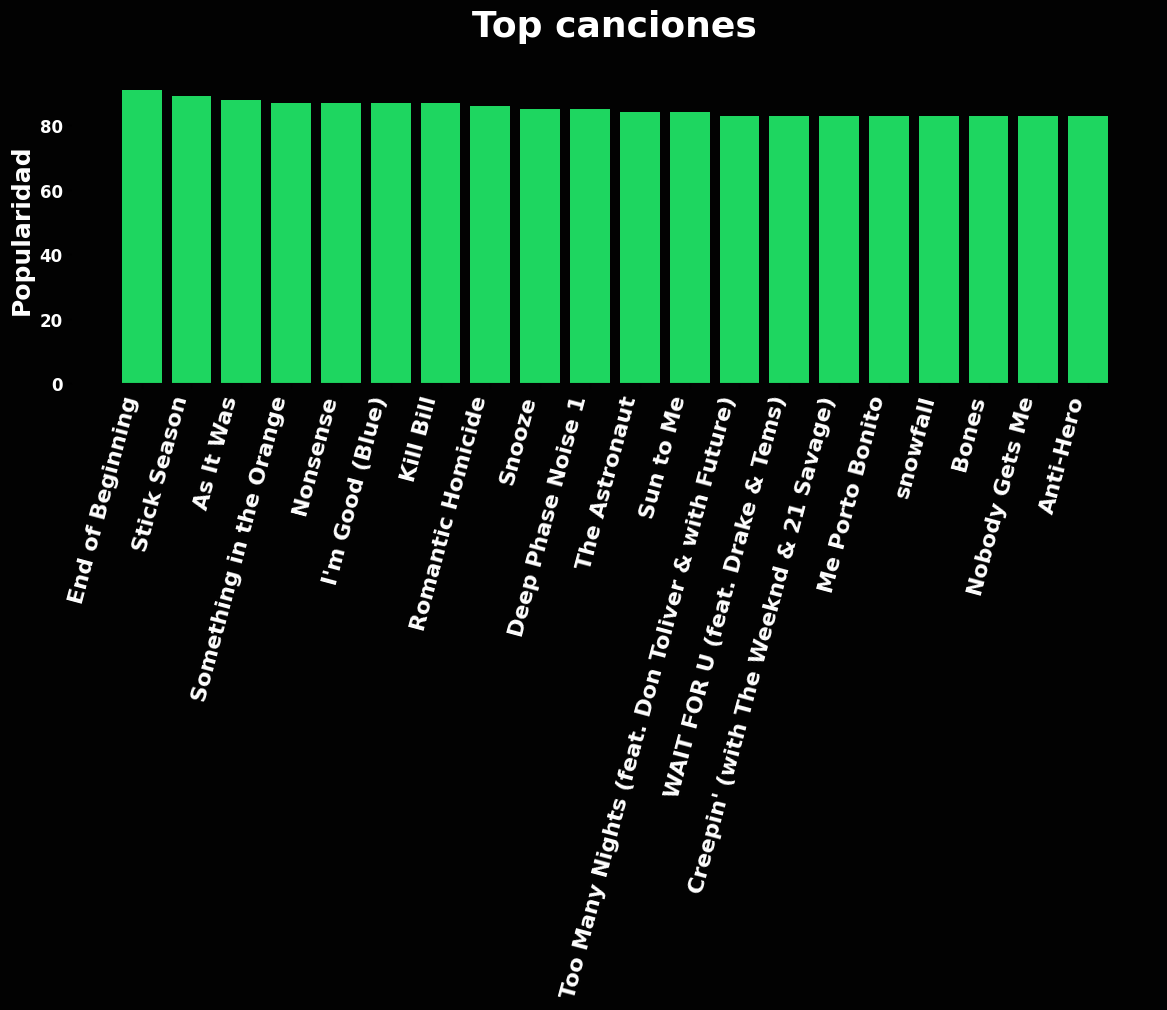

In [38]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

Artistas más populares según número de seguidores

In [39]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Taylor Swift,122420035,100,['pop']
2,Billie Eilish,99981193,95,"['art pop', 'pop']"
3,Drake,92173274,96,"['canadian hip hop', 'canadian pop', 'hip hop'..."
4,The Weeknd,91717642,96,"['canadian contemporary r&b', 'canadian pop', ..."
5,Bad Bunny,85882496,95,"['reggaeton', 'trap latino', 'urbano latino']"
6,BTS,75977022,87,"['k-pop', 'k-pop boy group', 'pop']"
7,Imagine Dragons,54675451,89,"['modern rock', 'pop', 'rock']"
8,BLACKPINK,51060186,81,"['k-pop', 'k-pop girl group', 'pop']"
9,KAROL G,50651045,92,"['reggaeton', 'reggaeton colombiano', 'urbano ..."
10,XXXTENTACION,46792947,88,"['emo rap', 'miami hip hop', 'rap']"


 Artistas más populares según popularidad

In [40]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Taylor Swift,122420035,100,['pop']
2,Drake,92173274,96,"['canadian hip hop', 'canadian pop', 'hip hop'..."
3,The Weeknd,91717642,96,"['canadian contemporary r&b', 'canadian pop', ..."
4,Sabrina Carpenter,12966273,95,['pop']
5,Bad Bunny,85882496,95,"['reggaeton', 'trap latino', 'urbano latino']"
6,Billie Eilish,99981193,95,"['art pop', 'pop']"
7,Future,18703169,93,"['atl hip hop', 'hip hop', 'rap', 'southern hi..."
8,Kanye West,27266956,93,"['chicago rap', 'hip hop', 'rap']"
9,Peso Pluma,16315303,93,"['corridos tumbados', 'sad sierreno']"
10,Post Malone,45436539,92,"['dfw rap', 'melodic rap', 'pop', 'rap']"


Géneros más populares

In [41]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 0:'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

,generos,count
1,rap,152
2,pop,144
3,hip hop,60
4,singer-songwriter pop,55
5,urbano latino,53
6,trap latino,51
7,sad sierreno,51
8,corrido,48
9,r&b,48
10,modern country pop,45


Canciones más populares (por seguidores) por género más popular

In [42]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

,nombre_cancion,popularidad_cancion,generos,count
0,Kill Bill,87,rap,152
1,As It Was,88,pop,144
2,WAIT FOR U (feat. Drake & Tems),83,hip hop,60
3,Stick Season,89,singer-songwriter pop,55
4,Me Porto Bonito,83,urbano latino,53
5,Me Porto Bonito,83,trap latino,51
6,Extssy Model,82,sad sierreno,51
7,Extssy Model,82,corrido,48
8,Kill Bill,87,r&b,48
9,Porch Light,80,modern country pop,45


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

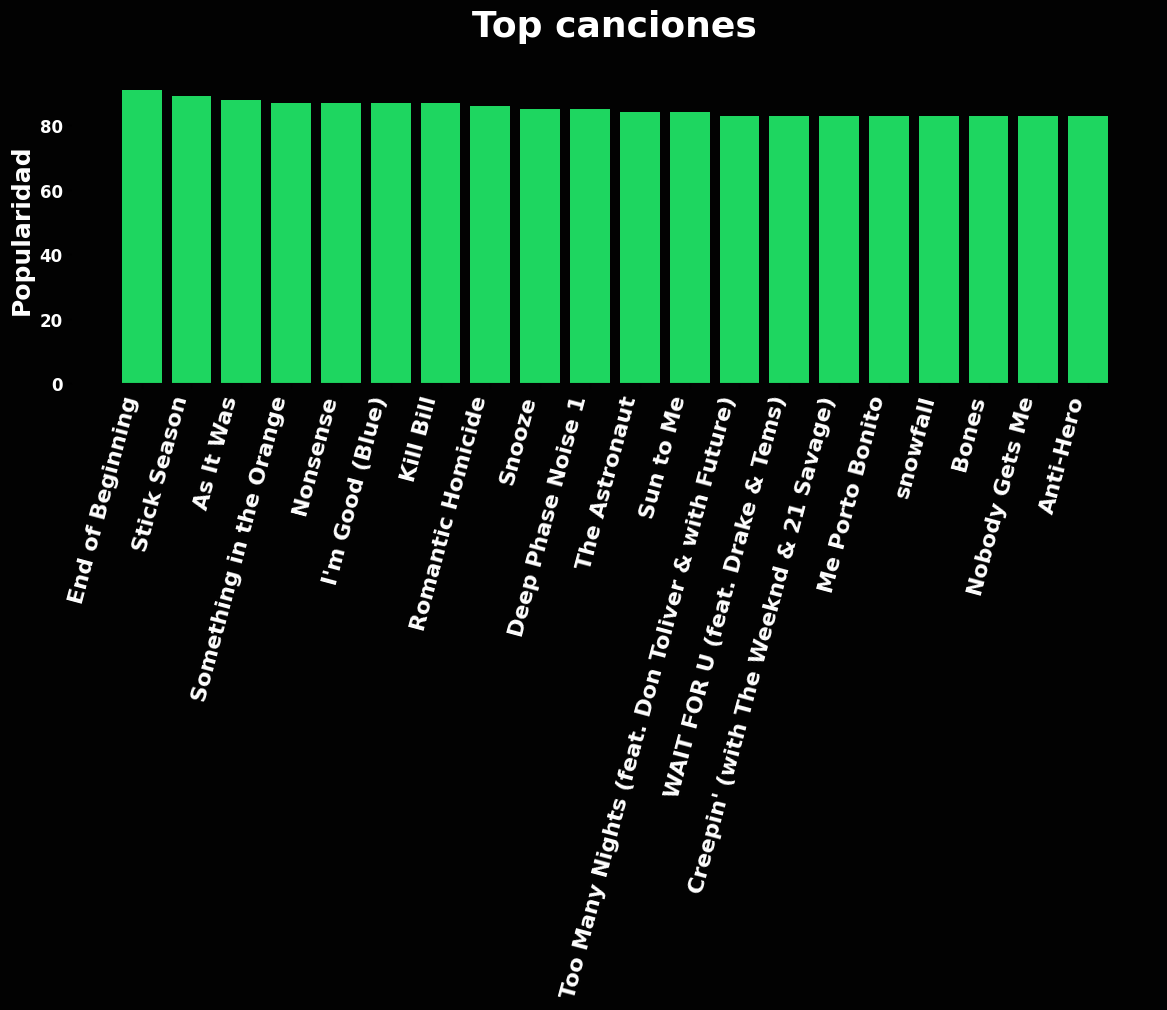

In [44]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()